# Linear Regression, Sum of Least Squares, Polynomial Regression

Suppose I have a bunch of data points that look like it follows a linear pattern. For this first example, we will look at the function __y = 3x + 1__.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
realB0 = 1
realB1 = 3

In [3]:
X = np.random.normal(1, 1.5, 100) # Most points will be around x = 1, to cluster them in one area.
noise = np.random.normal(0, 3, 100) # Random noise with mean 0, variance 3. 
Y = (realB0 + realB1 * X) + noise # Our Dataset.

PerfectX = np.arange(min(X), max(X), 0.1) # The true model/trendline
PerfectY = realB0 + realB1 * PerfectX

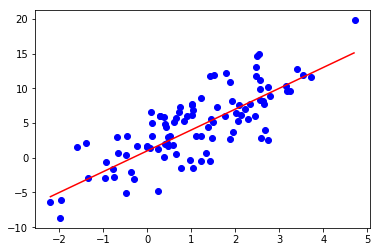

In [4]:
#Plot the perfect line to see what it looks like.
plt.plot(X, Y, 'bo')
plt.plot(PerfectX, PerfectY, 'r')

After making the assumption that this pattern is linear, I want to see if I can estimate the values of m and B (general form is Y = B1X + B0) so that it follows this pattern.

Using Calculus, we found that we can find the values for B_0 and B_1 (Math is freakin' awesome).

In [5]:
# Solved for B_1 at https://adjchen.com/wiki/linregress
avgX = X.mean()
avgY = Y.mean()
sumTop = 0
sumBot = 0
for i in range(len(X)):
    sumTop += (X[i] - avgX) * (Y[i] - avgY)
    sumBot += (X[i] - avgX) ** 2
B1 = (sumTop/sumBot)

In [6]:
B0 = avgY - B1 * avgX

In [7]:
print('Our model is: Y = ' + str(B0) + ' + ' + str(B1) + ' * X' )
print('Our real model was: Y = ' + str(realB0) + ' + ' + str(realB1) + ' * x')

Our model is: Y = 1.4781951475146462 + 2.8968004992615417 * X
Our real model was: Y = 1 + 3 * x


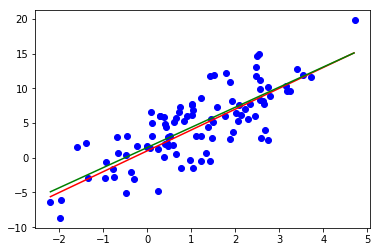

In [8]:
# Print out the data set, the perfect model, and our regression line.
ModelX = np.arange(min(X), max(X), 0.1)
ModelY = B0 + B1 * ModelX
plt.plot(X, Y, 'bo')
plt.plot(PerfectX, PerfectY, 'r')
plt.plot(ModelX, ModelY, 'g')

Here, the model is shown in green. The 'real' values are in red. This is pretty stinkin' good.

But what if we had multiple columns, multiple X's that factored into how Y is calculated?

$$\text{Y} \approx \beta_0 + \beta_1 \text{X}_0 + \beta_2 \text{X}_1 + ...$$

In [9]:
realB0 = 9
realB1 = 4
realB2 = -3

In [10]:
X0 = np.random.normal(5, 1.5, 100) #Cluster the X0's by 1.
X1 = np.random.normal(6, 1.5, 100) #Cluster the X1's by 2.
noise = np.random.normal(0, 3, 100) #Generate noise to add to model.
PerfectY = (realB0 + realB1 * X0 + realB2 * X1) #This is the true model.
Y = PerfectY + noise #Dataset

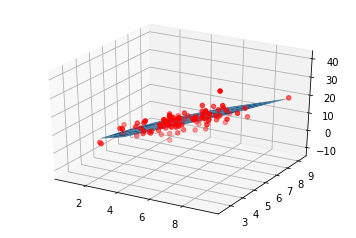

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #plot object
ax.plot_trisurf(X0, X1, PerfectY) #"plane"
ax.scatter(X0, X1, Y, c='r', marker='o') # points of the data set.
plt.show()

The generalized form of OLS (__ordinary least squares__) is:
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [12]:
X = np.column_stack((np.ones_like(X0),X0,X1)) #Combine the two columns into one 'X'
XT = X.transpose()
tmp = np.linalg.inv(XT.dot(X)).dot(XT)
tmp.dot(Y)

array([11.13423471,  3.94244806, -3.35209556])

The result is a matrix with all the estimated Betas.

But what if our data WASN'T linear? i.e: Y = 2 - 3x + 5x^2.

In [13]:
realB0 = 2
realB1 = -3
realB2 = 5

In [14]:
X = np.random.normal(1, 1.5, 100)
noise = np.random.normal(0, 3, 100)

X2 = X * X
X1 = X
X0 = np.ones_like(X1)
Y = (realB0 * X0 + realB1 * X1 + realB2 * X2) + noise #dataset

PerfectX = np.arange(min(X), max(X), 0.1)
PerfectY = realB0 + realB1 * PerfectX + realB2 * PerfectX * PerfectX #

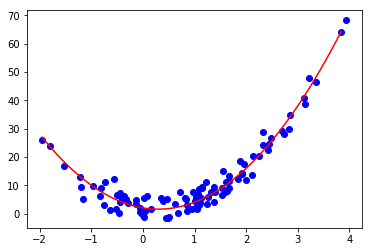

In [15]:
plt.plot(X, Y, 'bo')
plt.plot(PerfectX, PerfectY, 'r')

What if we ran the normal linear regression for this?

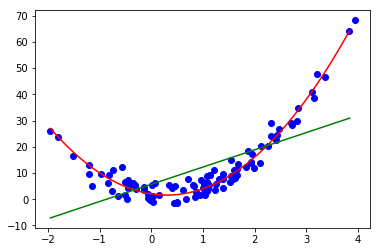

In [16]:
avgX = X.mean()
avgY = Y.mean()
sumTop = 0
sumBot = 0
for i in range(len(X)):
    sumTop += (X[i] - avgX) * (Y[i] - avgY)
    sumBot += (X[i] - avgX) ** 2
B1 = (sumTop/sumBot)

B0 = avgY - B1 * avgX

ModelX = np.arange(min(X), max(X), 0.1)
ModelY = B0 + B1 * ModelX
plt.plot(X, Y, 'bo')
plt.plot(PerfectX, PerfectY, 'r')
plt.plot(ModelX, ModelY, 'g')

This really sucks--but we can extend the ideas that we did in the linear example to higher degrees. We can use the same ideas from OLS (the exact same equation)
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$
But we can treat X^n as it's own independent variables (columns in X).

In [17]:
X = np.column_stack((X0, X1, X2)) #Combine the two columns into one 'X'
XT = X.transpose()
tmp = np.linalg.inv(XT.dot(X)).dot(XT)
B = tmp.dot(Y)

A reminder that we need to make some assumption about the form of the model (in this case, we assumed that it took the form $$y=ax^2+bx+c$$